In [1]:
from IPython import get_ipython


  # Computational Statistics Homework 05
  Kalin Gibbons
  2020-02-13

 ## Problem 1
 Problem 2.6 on page 56 of the _Computation Statistics_ book.
 Required output to be embedded within the submitted Jupyter Notebook:
 All of the output correspoinding to a specific question must begin in a
 Markdown Cell with a heading, for example,

 **Answer to part (a):**

 --so that the grader can easily find your answer to each question.

 * (a) - (c) each. Present your estimates in the last five iterations in a format similar
   to Table 2.1. Plot the fitted model together with the observed data in a
   single plot.

 ### Problem 2.6

 Table 2.3 provides counts of a flour beetle (_Tribolium confusum_) population
 at various points in time [103]. Beetles in all stages of development were
 counted, and the food supply was carefully controlled.

 An elementary model for population growth is the logistic model given by

 $$\frac{d N}{d t} = r N \left( 1 - \frac{N}{K} \right),$$

 where $N$ is population size, $t$ is time, $r$ is a growth rate parameter,
 and $K$ is a parameter that represents the population carrying capacity of
 the environment. The solution to this differential equation is given by

 $$N_t = f(t) = \frac{K N_0}{N_0 + (K - N_0) \exp(-r t)}$$

 where $N_t$ denotes the population size at time $t$.

 * (a) Fit the logistic growth model to the flour beetle data using the
   Gauss-Newton approach to minimize the sum of squared errors between model
   predictions and observed counts.

 * (b) Fit the logistic growth model to the flour beetle data using the
   Newton-Raphson approach to minimze the sum of squared errors between model
   predictions and observed counts.

 * (c) In many population modeling applications, an assumption of lognormality
   is adopted. The simples assumption would be that the $\log N_t$ are
   independent and normally distributed with mean $\log f(t)$ and variance
   $\sigma^2$. Find the MLEs under this assumption, using both the
   Gauss-Newton and Newton-Raphson methods. Provide standard errors for your
   parameter estimates, and an estimate of the correlation between them.
   Comment.

 #### Module importing

In [2]:
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt


 #### Import the data

In [3]:
dat_dict = {'days': [0, 8, 28, 41, 63, 79, 97, 117, 135, 154],
            'population': [2, 47, 192, 256, 768, 896, 1120, 896, 1184, 1024]}
beetle_data = pd.DataFrame(dat_dict)
beetle_data


,days,population
0,0,2
1,8,47
2,28,192
3,41,256
4,63,768
5,79,896
6,97,1120
7,117,896
8,135,1184
9,154,1024


 #### Plan the solution
 The growth rate $r$ and population carrying capacity $K$ are the parameters
 which will need to be fit to the data. This is a bivariate optimization
 problem, which will require two gradients of length two, and two $2 \times 2$
 Hessian's, for the Newton-Raphson method. There are products and quotients of
 functions of differentiable variables, so we will want to use sympy to
 facilitate our calculations.

 For the Gauss Newton method, we are maximizing an objective function

 $$N_i = f(\mathbf{t_i}, \mathbf{\theta}) + \varepsilon_i$$


 for our nonlinear function $f$ and random error $\varepsilon_i$.

 We can formulate the solutions as:

 $$\Delta\mathbf{\theta} = \left( \mathbf{J^{(t)}} \cdot \mathbf{J^{(t)}} \right)^{-1} \mathbf{J^{(t)}} \mathbf{x^{(t)}}$$

 Where

 $$\Delta \mathbf{\theta} = \mathbf{\theta}^{(t + 1)} - \mathbf{\theta}^{(t)}$$

 and $\mathbf{x}^{(t)}$ is a column vector called the working response, which
 contains elements

 $$x_i^{(t)} = n_{i}^{(t)} - f(t, N_o; K, r)$$


In [4]:
# Set up the function using sympy
k, n0, r, t = sp.symbols('K N_0 r t')

num = k * n0
den = n0 + (k - n0) * sp.exp(-r * t)
n_beetles = num / den
n_beetles

K*N_0/(N_0 + (K - N_0)*exp(-r*t))

 Create the Jacobians

In [5]:
repeated_funcs = []
pop_0 = beetle_data.loc[0, 'population']

# Need a function evaluated at each data point to create the Jacobian
for row in beetle_data.itertuples():
    this_func = n_beetles.subs(t, row.days).subs(n0, pop_0)
    repeated_funcs.append(this_func)

# Now we can take the derivatives to make it
jacobian = sp.derive_by_array(repeated_funcs, (k, r)).transpose()
jacobian

[[0, 0], [-2*K*exp(-8*r)/((K - 2)*exp(-8*r) + 2)**2 + 2/((K - 2)*exp(-8*r) + 2), 16*K*(K - 2)*exp(-8*r)/((K - 2)*exp(-8*r) + 2)**2], [-2*K*exp(-28*r)/((K - 2)*exp(-28*r) + 2)**2 + 2/((K - 2)*exp(-28*r) + 2), 56*K*(K - 2)*exp(-28*r)/((K - 2)*exp(-28*r) + 2)**2], [-2*K*exp(-41*r)/((K - 2)*exp(-41*r) + 2)**2 + 2/((K - 2)*exp(-41*r) + 2), 82*K*(K - 2)*exp(-41*r)/((K - 2)*exp(-41*r) + 2)**2], [-2*K*exp(-63*r)/((K - 2)*exp(-63*r) + 2)**2 + 2/((K - 2)*exp(-63*r) + 2), 126*K*(K - 2)*exp(-63*r)/((K - 2)*exp(-63*r) + 2)**2], [-2*K*exp(-79*r)/((K - 2)*exp(-79*r) + 2)**2 + 2/((K - 2)*exp(-79*r) + 2), 158*K*(K - 2)*exp(-79*r)/((K - 2)*exp(-79*r) + 2)**2], [-2*K*exp(-97*r)/((K - 2)*exp(-97*r) + 2)**2 + 2/((K - 2)*exp(-97*r) + 2), 194*K*(K - 2)*exp(-97*r)/((K - 2)*exp(-97*r) + 2)**2], [-2*K*exp(-117*r)/((K - 2)*exp(-117*r) + 2)**2 + 2/((K - 2)*exp(-117*r) + 2), 234*K*(K - 2)*exp(-117*r)/((K - 2)*exp(-117*r) + 2)**2], [-2*K*exp(-135*r)/((K - 2)*exp(-135*r) + 2)**2 + 2/((K - 2)*exp(-135*r) + 2), 270*K*

 Create the working response array.

In [6]:
work_resp = []
for row in beetle_data.itertuples():
    this_func = row.population - n_beetles.subs([(t, row.days), (n0, pop_0)])
    work_resp.append(this_func)
work_resp


[0,
 -2*K/((K - 2)*exp(-8*r) + 2) + 47,
 -2*K/((K - 2)*exp(-28*r) + 2) + 192,
 -2*K/((K - 2)*exp(-41*r) + 2) + 256,
 -2*K/((K - 2)*exp(-63*r) + 2) + 768,
 -2*K/((K - 2)*exp(-79*r) + 2) + 896,
 -2*K/((K - 2)*exp(-97*r) + 2) + 1120,
 -2*K/((K - 2)*exp(-117*r) + 2) + 896,
 -2*K/((K - 2)*exp(-135*r) + 2) + 1184,
 -2*K/((K - 2)*exp(-154*r) + 2) + 1024]

 Now we can get out of the slow `sympy` calculations, and back to the fast
 `numpy` based ones.

In [7]:
work_resp = sp.utilities.lambdify((k, r), work_resp, 'numpy')
jacobian = sp.utilities.lambdify((k, r), jacobian, 'numpy')

,"[K, r]","var_cov([K, Kr], [rK, r])",Std. Error
iteration,,,
6,"[1033.44705, 0.11798]","[[0.21963, -1e-05], [-1e-05, 0.0]]","[0.46865, 0.0]"
7,"[1033.49736, 0.11797]","[[0.21976, -1e-05], [-1e-05, 0.0]]","[0.46879, 0.0]"
8,"[1033.51058, 0.11796]","[[0.2198, -1e-05], [-1e-05, 0.0]]","[0.46883, 0.0]"
9,"[1033.51407, 0.11796]","[[0.2198, -1e-05], [-1e-05, 0.0]]","[0.46883, 0.0]"
10,"[1033.515, 0.11796]","[[0.21981, -1e-05], [-1e-05, 0.0]]","[0.46884, 0.0]"


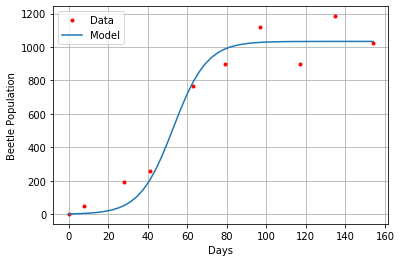

In [8]:
# Define convergence
def has_relative_convergence(vec_list, tol=1e-6):
    vec_list = np.asarray(vec_list)
    vec_new = vec_list[-1]
    vec_prev = vec_list[-2]
    numerator = np.linalg.norm(vec_new - vec_prev)
    denominator = np.linalg.norm(vec_prev - np.zeros_like(vec_prev))
    if denominator == 0:
        denominator += tol
    return numerator / denominator < tol


# Define the single Gauss-Newton update
def gauss_newton_update(guess):
    guess = np.array(guess)
    k = guess[0]
    r = guess[1]
    J = np.array(jacobian(k, r))
    x = np.array(work_resp(k, r))
    hess_estimate = -np.linalg.inv(J.T @ J)
    new_guess = guess - hess_estimate @ J.T @ x
    return new_guess, -hess_estimate


# Define the full Gauss-Newton algorithm
def gauss_newton(guess):
    J = np.array(jacobian(guess[0], guess[1]))
    init_var_cov = -np.linalg.inv(J.T @ J)
    new_guess, new_var_cov = gauss_newton_update(guess)
    guess_array = np.vstack((guess, new_guess))
    var_cov_array = np.dstack((init_var_cov, new_var_cov))
    while not has_relative_convergence(guess_array):
        new_guess, new_var_cov = gauss_newton_update(guess_array[-1])
        guess_array = np.vstack((guess_array, new_guess))
        var_cov_array = np.dstack((var_cov_array, new_var_cov))
    return guess_array, np.moveaxis(var_cov_array, 2, 0)


def create_plot(guess_array):
    estimate_pop = sp.lambdify(
        (t),
        n_beetles.subs(
            [
                (n0, pop_0),
                (k, guess_array[-1, 0]),
                (r, guess_array[-1, 1])
            ]
        )
    )

    time = np.linspace(beetle_data['days'].min(), beetle_data['days'].max())
    plt.plot(
        beetle_data['days'], beetle_data['population'], 'r.', label='Data'
    )
    plt.plot(time, estimate_pop(time), label='Model')
    plt.xlabel('Days')
    plt.ylabel('Beetle Population')
    plt.grid()
    plt.legend()


def create_table(guess_array, var_cov_array):
    iters = np.arange(guess_array.shape[0])[-5:]
    guess_array = guess_array[-5:]
    var_cov = var_cov_array[-5:]
    table_dict = {'iteration': iters,
                  '[K, r]': guess_array.round(5).tolist(),
                  'var_cov([K, Kr], [rK, r])': var_cov.round(5).tolist()}
    return pd.DataFrame(table_dict).set_index('iteration')


def add_std_err(table):
    var_cov_series = table.iloc[:, -1]
    std_errs = []
    for var_cov in var_cov_series:
        std_errs.append(np.sqrt(np.diag(var_cov)).round(5))
    table['Std. Error'] = std_errs
    return table


init_guess = [1200, 0.17]
guess_array, var_cov_array = gauss_newton(init_guess)
create_plot(guess_array)
gauss_newt_table = create_table(guess_array, var_cov_array)
add_std_err(gauss_newt_table)

 #### (b) Fit the logistic growth model using the Newton-Raphson approach
 Minimize the sum of squared errors between the logistic growth model
 predictions and the observed counts of flour beetles.

 This time around we need to calculate the Hessian, and there are also
 summations within the partial derivatives. The last time I tried doing
 summations in `sympy`, I failed to make it work. We'll skip it this time and
 perform summations after converting to `numpy` based functions. We'll start
 by defining the sequence inside of the sum.

In [9]:
ni = sp.symbols('N_i')
sequence = -(ni - n_beetles)**2
sequence

-(-K*N_0/(N_0 + (K - N_0)*exp(-r*t)) + N_i)**2

 Now we can calculate the gradient of this sequence.

In [10]:
gradient = sp.derive_by_array(sequence, (k, r))
gradient

[-(-K*N_0/(N_0 + (K - N_0)*exp(-r*t)) + N_i)*(2*K*N_0*exp(-r*t)/(N_0 + (K - N_0)*exp(-r*t))**2 - 2*N_0/(N_0 + (K - N_0)*exp(-r*t))), 2*K*N_0*t*(K - N_0)*(-K*N_0/(N_0 + (K - N_0)*exp(-r*t)) + N_i)*exp(-r*t)/(N_0 + (K - N_0)*exp(-r*t))**2]

 Taking the derivative a second time will yield the Hessian of this sequence.

In [11]:
hessian = sp.derive_by_array(gradient, (k, r))
hessian

[[(K*N_0/(N_0 + (K - N_0)*exp(-r*t)) - N_i)*(-4*K*N_0*exp(-2*r*t)/(N_0 + (K - N_0)*exp(-r*t))**3 + 4*N_0*exp(-r*t)/(N_0 + (K - N_0)*exp(-r*t))**2) + (-K*N_0*exp(-r*t)/(N_0 + (K - N_0)*exp(-r*t))**2 + N_0/(N_0 + (K - N_0)*exp(-r*t)))*(2*K*N_0*exp(-r*t)/(N_0 + (K - N_0)*exp(-r*t))**2 - 2*N_0/(N_0 + (K - N_0)*exp(-r*t))), 2*K*N_0*t*(K - N_0)*(K*N_0*exp(-r*t)/(N_0 + (K - N_0)*exp(-r*t))**2 - N_0/(N_0 + (K - N_0)*exp(-r*t)))*exp(-r*t)/(N_0 + (K - N_0)*exp(-r*t))**2 - 4*K*N_0*t*(K - N_0)*(-K*N_0/(N_0 + (K - N_0)*exp(-r*t)) + N_i)*exp(-2*r*t)/(N_0 + (K - N_0)*exp(-r*t))**3 + 2*K*N_0*t*(-K*N_0/(N_0 + (K - N_0)*exp(-r*t)) + N_i)*exp(-r*t)/(N_0 + (K - N_0)*exp(-r*t))**2 + 2*N_0*t*(K - N_0)*(-K*N_0/(N_0 + (K - N_0)*exp(-r*t)) + N_i)*exp(-r*t)/(N_0 + (K - N_0)*exp(-r*t))**2], [K*N_0*t*(K - N_0)*(2*K*N_0*exp(-r*t)/(N_0 + (K - N_0)*exp(-r*t))**2 - 2*N_0/(N_0 + (K - N_0)*exp(-r*t)))*exp(-r*t)/(N_0 + (K - N_0)*exp(-r*t))**2 + (K*N_0/(N_0 + (K - N_0)*exp(-r*t)) - N_i)*(4*K*N_0*t*(K - N_0)*exp(-2*r*t)/(

 Now, we need to make our sequential gradients and Hessian's realized, so that
 we can actually sum them.

In [12]:
# Load up symbolic arrays with numerical substitutions, then we can convert
# them to `numpy` functions and get access to the `numpy.ndarray.sum()` method.
grad_ary = []
hess_ary = []
for row in beetle_data.itertuples():
    grad_ary.append(
        gradient.subs([(t, row.days), (n0, pop_0), (ni, row.population)])
    )
    hess_ary.append(
        hessian.subs([(t, row.days), (n0, pop_0), (ni, row.population)])
    )

 Convert our symbolic functions into `numpy` functions.

In [13]:
grad_ary = sp.lambdify((k, r), grad_ary, 'numpy')
hess_ary = sp.lambdify((k, r), hess_ary, 'numpy')

 Now we can go about our business defining functions as usual, but we have to
 be careful about which axis we sum along, because we need two distinct values
 for the gradient, and a 2 by 2 array of values for the Hessian. If we aren't
 careful, an error will be thrown when performing linear algebra operations.

,"[K, r]","var_cov([K, Kr], [rK, r])",Std. Error
iteration,,,
4,"[1037.28717, 0.11591]","[[0.11706, -1e-05], [-1e-05, 0.0]]","[0.34214, 0.0]"
5,"[1033.84673, 0.11779]","[[0.11648, -1e-05], [-1e-05, 0.0]]","[0.34129, 0.0]"
6,"[1033.51769, 0.11796]","[[0.1172, -1e-05], [-1e-05, 0.0]]","[0.34234, 0.0]"
7,"[1033.51533, 0.11796]","[[0.11726, -1e-05], [-1e-05, 0.0]]","[0.34243, 0.0]"
8,"[1033.51533, 0.11796]","[[0.11726, -1e-05], [-1e-05, 0.0]]","[0.34243, 0.0]"


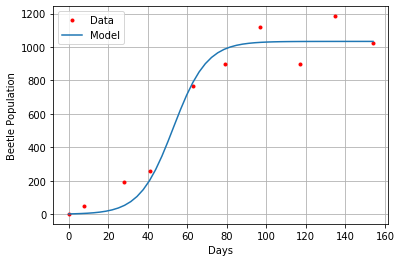

In [14]:
def newton_raph_update(guess):
    k = guess[0]
    r = guess[1]
    grad = np.array(grad_ary(k, r)).sum(axis=0)
    hess = np.array(hess_ary(k, r)).sum(axis=0)
    var_cov = -np.linalg.inv(hess)
    new_guess = guess + var_cov @ grad
    return new_guess, var_cov


def newton_raph(guess):
    hess = np.array(hess_ary(guess[0], guess[1])).sum(axis=0)
    init_var_cov = -np.linalg.inv(hess)
    new_guess, new_var_cov = newton_raph_update(guess)
    guess_array = np.vstack((guess, new_guess))
    var_cov_array = np.dstack((init_var_cov, new_var_cov))
    while not has_relative_convergence(guess_array):
        new_guess, new_var_cov = newton_raph_update(guess_array[-1])
        guess_array = np.vstack((guess_array, new_guess))
        var_cov_array = np.dstack((var_cov_array, new_var_cov))
    return guess_array, np.moveaxis(var_cov_array, 2, 0)


guess_array, var_cov_array = newton_raph(init_guess)
create_plot(guess_array)
newt_raph_table = create_table(guess_array, var_cov_array)
add_std_err(newt_raph_table)

 #### (c) Find the MLEs assuming lognormality using both algorithms

 In many population modeling applications, an assumption of lognormality
 is adopted. The simplest assumption would be that the $\log N_t$ are
 independent and normally distributed with mean $\log f(t)$ and variance
 $\sigma^2$. Find the MLEs under this assumption, using both the
 Gauss-Newton and Newton-Raphson methods. Provide standard errors for your
 parameter estimates, and an estimate of the correlation between them.
 Comment.

 #### Plan the solution

 All of the required changes happen before the iteration steps are defined, so
 we need to recalculate all of the `sympy` equations using logarithms, with
 the exception of the $N_0$ constant, which is burried within $f(t)$.

In [15]:
k, n0, r, t = sp.symbols('K N_0 r t')

num = k * n0
den = n0 + (k - n0) * sp.exp(-r * t)
n_beetles = num / den

# Need to update the beetle data and its defining function
beetle_data['population'] = np.log(beetle_data['population'])
n_beetles = sp.log(n_beetles)
pop_0 = np.exp(beetle_data.loc[0, 'population'])

 Normally, I would wrap the above code in a function, but I liked all of the
 intermediate printouts and explanatory markdown cells. So, this time we'll
 copy-paste and condense from above.

,"[K, r]","var_cov([K, Kr], [rK, r])",Std. Error
iteration,,,
31,"[820.36582, 0.19262]","[[102427.33766, -3.3164], [-3.3164, 0.00247]]","[320.04271, 0.0497]"
32,"[820.36399, 0.19262]","[[102426.54037, -3.31642], [-3.31642, 0.00247]]","[320.04147, 0.0497]"
33,"[820.36261, 0.19262]","[[102425.9427, -3.31644], [-3.31644, 0.00247]]","[320.04053, 0.0497]"
34,"[820.36158, 0.19262]","[[102425.49467, -3.31646], [-3.31646, 0.00247]]","[320.03983, 0.0497]"
35,"[820.36081, 0.19262]","[[102425.15881, -3.31647], [-3.31647, 0.00247]]","[320.03931, 0.0497]"


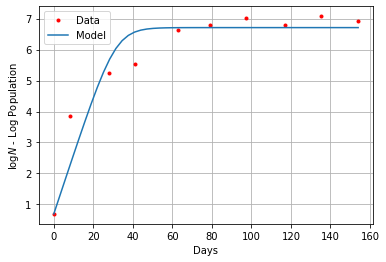

In [16]:
repeated_funcs = []
for row in beetle_data.itertuples():
    this_func = n_beetles.subs(t, row.days).subs(n0, pop_0)
    repeated_funcs.append(this_func)

jacobian = sp.derive_by_array(repeated_funcs, (k, r)).transpose()
work_resp = []
for row in beetle_data.itertuples():
    this_func = row.population - n_beetles.subs([(t, row.days), (n0, pop_0)])
    work_resp.append(this_func)

work_resp = sp.utilities.lambdify((k, r), work_resp, 'numpy')
jacobian = sp.utilities.lambdify((k, r), jacobian, 'numpy')

init_guess = [1200, 0.17]
guess_array, var_cov_array = gauss_newton(init_guess)
create_plot(guess_array)
plt.ylabel(r'$\log N$ - Log Population')
gauss_newt_table = create_table(guess_array, var_cov_array)
add_std_err(gauss_newt_table)


,"[K, r]","var_cov([K, Kr], [rK, r])",Std. Error
iteration,,,
9,"[837.56211, 0.18434]","[[73200.90968, -4.64416], [-4.64416, 0.00161]]","[270.55667, 0.04012]"
10,"[823.47298, 0.19105]","[[71819.65616, -7.51267], [-7.51267, 0.00304]]","[267.9919, 0.05514]"
11,"[820.50366, 0.19255]","[[74062.23594, -10.03152], [-10.03152, 0.00435]]","[272.14378, 0.06595]"
12,"[820.35884, 0.19262]","[[75091.49593, -10.84226], [-10.84226, 0.00477]]","[274.02828, 0.06907]"
13,"[820.3585, 0.19262]","[[75149.01027, -10.88551], [-10.88551, 0.00479]]","[274.1332, 0.06921]"


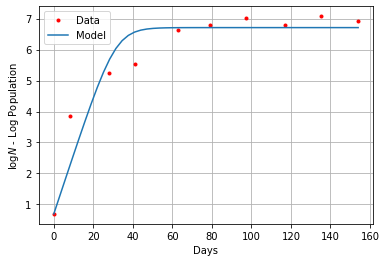

In [17]:
ni = sp.symbols('N_i')
sequence = -(ni - n_beetles)**2
gradient = sp.derive_by_array(sequence, (k, r))
hessian = sp.derive_by_array(gradient, (k, r))

grad_ary = []
hess_ary = []
for row in beetle_data.itertuples():
    grad_ary.append(
        gradient.subs([(t, row.days), (n0, pop_0), (ni, row.population)])
    )
    hess_ary.append(
        hessian.subs([(t, row.days), (n0, pop_0), (ni, row.population)])
    )

grad_ary = sp.lambdify((k, r), grad_ary, 'numpy')
hess_ary = sp.lambdify((k, r), hess_ary, 'numpy')

guess_array, var_cov_array = newton_raph(init_guess)
create_plot(guess_array)
plt.ylabel(r'$\log N$ - Log Population')
newt_raph_table = create_table(guess_array, var_cov_array)
add_std_err(newt_raph_table)

The standard errors for our $K$ are much higher for both of these methods. However, we did use the negated invers Hessian,

$$-(\ell^{\prime \prime} (\theta))^{-1},$$

estimation for calculating them in both cases. There is likely a better method of calculating these values for the Gauss-Newton method, but we are able to make a relative comparison of their accuracy, currently. The Newton-Raphson method was still better under the log-normality assumption.

 ## Problem 2 Reproduce the solution to Example 4.2

 Present the output of your code in the format of Table 4.1

In [18]:


def observed_data(ncc, nci, nct, nii, nit, ntt):
    nc = np.array([ncc, nci, nct]).sum()
    ni = np.array([nii, nit]).sum()
    nt = np.array(ntt).sum()
    nvec = np.array((nc, ni, nt))
    return nvec


def calc_ncc(nc, pc, pi, pt):
    num = nc * pc**2
    den = pc**2 + 2 * pc * pi + 2 * pc * pt
    return num / den


def calc_nci(nc, pc, pi, pt):
    num = 2 * nc * pc * pi
    den = pc**2 + 2 * pc * pi + 2 * pc * pt
    return num / den


def calc_nct(nc, pc, pi, pt):
    num = 2 * nc * pc * pt
    den = pc**2 + 2 * pc * pi + 2 * pc * pt
    return num / den


def calc_nii(ni, pi, pt):
    num = ni * pi**2
    den = pi**2 + 2 * pi * pt
    return num / den


def calc_nit(ni, pi, pt):
    num = 2 * ni * pi * pt
    den = pi**2 + 2 * pi * pt
    return num / den


def calc_ntt(nt):
    return nt


def calc_pc(ncc, nci, nct, n):
    num = 2 * ncc + nci + nct
    den = 2 * n
    return num / den


def calc_pi(nii, nit, nci, n):
    num = 2 * nii + nit + nci
    den = 2 * n
    return num / den


def calc_pt(pvec):
    return 1 - np.array(pvec)[:2].sum()


def exp_max_update(nvec, pvec):
    pc = pvec[0]
    pi = pvec[1]
    pt = calc_pt(pvec)

    nc = nvec[0]
    ni = nvec[1]
    nt = nvec[2]
    n = nvec.sum()

    ncc = calc_ncc(nc, pc, pi, pt)
    nci = calc_nci(nc, pc, pi, pt)
    nct = calc_nct(nc, pc, pi, pt)
    nii = calc_nii(ni, pi, pt)
    nit = calc_nit(ni, pi, pt)
    ntt = calc_ntt(nt)
    nvec_new = observed_data(ncc, nci, nct, nii, nit, ntt)

    pc_new = calc_pc(ncc, nci, nct, n)
    pi_new = calc_pi(nii, nit, nci, n)
    pt_new = calc_pt([pc_new, pi_new])
    pvec_new = np.array((pc_new, pi_new, pt_new))
    return nvec_new, pvec_new


def calc_r(vec_list, tol=1e-6):
    vec_list = np.asarray(vec_list)
    vec_new = vec_list[-1][:2]
    vec_prev = vec_list[-2][:2]
    numerator = np.linalg.norm(vec_new - vec_prev)
    denominator = np.linalg.norm(vec_prev - np.zeros_like(vec_prev))
    if denominator == 0:
        denominator += tol
    return numerator / denominator


def calc_d(vec_list, idx):
    vec_list = np.array(vec_list)[-2:]
    if idx == 0:
        phat = 0.07083690804738547
    if idx == 1:
        phat = 0.1887365265825768
    p = vec_list[:, idx]
    return np.abs(p[-1] - phat) / np.abs(p[-2] - phat)


def expectation_maximization(nvec, pvec):
    new_nvec, new_pvec = exp_max_update(nvec, pvec)
    pvec_list = np.vstack((pvec, new_pvec))
    r = calc_r(pvec_list)
    r_list = np.array((np.nan, r))
    dc_list = np.array([np.nan, calc_d(pvec_list, idx=0)])
    di_list = np.array([np.nan, calc_d(pvec_list, idx=1)])
    while not r < 3e-5:
        new_nvec, new_pvec = exp_max_update(nvec, new_pvec)
        pvec_list = np.vstack((pvec_list, new_pvec))
        r = calc_r(pvec_list)
        r_list = np.append(r_list, r)
        dc_list = np.append(dc_list, calc_d(pvec_list, idx=0))
        di_list = np.append(di_list, calc_d(pvec_list, idx=1))

    df_dict = {
        'pc': pvec_list[:, 0],
        'pi': pvec_list[:, 1],
        'R': r_list,
        'Dc': dc_list,
        'Di': di_list
    }
    return pd.DataFrame(df_dict)



In [19]:
pc = 1 / 3
pi = 1 / 3
pt = 1 / 3
pvec = np.array([pc, pi, pt])

nc = 85
ni = 196
nt = 341
nvec = np.array([nc, ni, nt])

expectation_maximization(nvec, pvec)



,pc,pi,R,Dc,Di
0,0.333333,0.333333,NaN,NaN,NaN
1,0.081994,0.237406,0.570685,0.042502,0.336589
2,0.071249,0.197870,0.163121,0.036933,0.187655
3,0.070852,0.190360,0.035756,0.036727,0.177799
4,0.070837,0.189023,0.006586,0.036719,0.176237
5,0.070837,0.188787,0.001168,0.036719,0.175921
6,0.070837,0.188745,0.000206,0.036719,0.175749
7,0.070837,0.188738,0.000036,0.036717,0.175087
8,0.070837,0.188737,0.000006,0.036671,0.171366



The table is matching up nicely, and the $D_x$ terms converged to constants (though not if you pluck the truncated book estimates of $\hat{p}_x$).